In [6]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

#https://pages.uoregon.edu/soper/Light/luminosity.html
def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4))
    return math.log10(math.sqrt(ans))

In [4]:
data = [[-0.31, 34000],[-0.24, 23000],[-0.20, 18500],[-0.12, 13000],[0.0, 9500],[0.15, 8500],[0.29, 7300],
        [0.42, 6600],[0.58, 5900],[0.69, 5600],[0.85, 5100],[1.16, 4200],[1.42, 3700],[1.61,3000]]
df = pd.DataFrame(data, columns = ['b-v', 'temp'])
df

,b-v,temp
0,-0.31,34000
1,-0.24,23000
2,-0.20,18500
3,-0.12,13000
4,0.00,9500
5,0.15,8500
6,0.29,7300
7,0.42,6600
8,0.58,5900
9,0.69,5600


In [4]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 50 and 60 AND
#DEC between 20 and 30 AND
#parallax > 6.2 AND parallax < 12.5

p = pd.read_csv("pleiades_ra_dec.csv")

In [5]:
p['astrometric_pseudo_colour']

0       1.516568
1       1.544310
2       1.345028
3       1.332233
4       1.411871
          ...   
1806    1.369635
1807    1.276238
1808    1.527095
1809    1.409934
1810    1.597010
Name: astrometric_pseudo_colour, Length: 1811, dtype: float64

In [4]:
p['bp_rp']

0       1.238516
1       1.178280
2       2.404310
3       2.738242
4       1.803403
          ...   
1806    2.056740
1807    2.425686
1808    1.293740
1809    1.842913
1810    0.787899
Name: bp_rp, Length: 1811, dtype: float64

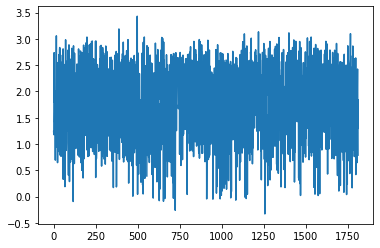

In [10]:
plt.plot(p['bp_rp'])

In [1]:
#temp
def colorTemperatureToRGB(kelvin, color):
    temp = kelvin / 100
    red = 0
    green = 0
    blue = 0
    if temp <= 66:
        red = 255
        green = temp
        green = 99.4708025861 * math.log(green) - 161.1195681661

        if temp <= 19:
            blue = 0
        else:
            blue = temp-10
            blue = 138.5177312231 * math.log(blue) - 305.0447927307

    else:
        red = temp - 60
        red = 329.698727446 * math.pow(red, -0.1332047592)
        green = temp - 60
        green = 288.1221695283 * math.pow(green, -0.0755148492 )
        blue = 255

    if color=='red':
        return clamp(red, 0, 255)
    elif color == 'green':
        return clamp(green, 0, 255)
    elif color == 'blue':
        return clamp(blue, 0, 255)
    else:
        return 0

def clamp( x, min, max ):

    if x<min:
        return min
    if x>max:
        return max

    return x

In [13]:
pb = pd.read_csv('pb2.csv')
pb.loc[:, 'parallax_arcsec'] = pb['parallax'].apply(lambda x: x*.001)
pb.loc[:, 'R'] = pb['parallax_arcsec'].apply(distance)
pb.loc[:, 'x'] = pb.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pb.loc[:, 'y'] = pb.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pb.loc[:, 'z'] = pb.apply(lambda r: z(r['R'], r['b']), axis=1)
pb.loc[:, 'magnitude'] = pb.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
pb.loc[:, 'luminosity'] = pb.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
pb.loc[:, 'solar_luminosity'] = pb.apply(lambda x: solar_lum(x['luminosity']), axis=1)
pb.loc[:, 'radius'] = pb.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1)
pb.loc[:, 'red'] = pb.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'red'), axis=1)
pb.loc[:, 'green'] = pb.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'green'), axis=1)
pb.loc[:, 'blue'] = pb.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'blue'), axis=1)
pb

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,x,y,z,magnitude,luminosity,solar_luminosity,radius,red,green,blue
0,1635721458409799680,Gaia DR2 3437768514657147776,3437768514657147776,931156372,2015.5,90.854790,0.037382,30.205299,0.034138,4.831554,...,-206.450124,-3.095353,14.369690,6.089881,6.820150e+06,1.781648e-20,-0.887113,255.0,225.684653,201.866383
1,1635721458409799680,Gaia DR2 3437829335690453120,3437829335690453120,1237257001,2015.5,91.396984,0.034809,30.624073,0.030617,9.258167,...,-107.657324,-1.352932,8.649974,9.028331,2.081214e+06,5.436819e-21,-0.967160,255.0,205.335493,165.188030
2,1635721458409799680,Gaia DR2 3437805971068394368,3437805971068394368,857869298,2015.5,91.634937,0.058760,30.299241,0.055078,5.319948,...,-187.327262,-3.612391,15.127065,9.532850,7.061267e+06,1.844636e-20,-0.740664,255.0,209.777308,173.388241
3,1635721458409799680,Gaia DR2 3437789340950898432,3437789340950898432,1691125807,2015.5,90.760984,0.490409,30.517362,0.460857,5.863878,...,-170.099276,-1.622158,12.082933,4.019263,3.719777e+06,9.717285e-21,-1.206274,255.0,247.159825,238.528577
4,1635721458409799680,Gaia DR2 3437792742569537664,3437792742569537664,1615068993,2015.5,90.694545,0.119306,30.566807,0.107067,5.432054,...,-183.629303,-1.522694,12.960991,9.649042,6.803016e+06,1.777172e-20,-0.645862,255.0,197.994102,151.358736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43766,1635721458409799680,Gaia DR2 3437780196965506944,3437780196965506944,295740755,2015.5,90.661011,0.023633,30.359680,0.021212,4.752926,...,-209.893631,-2.351874,14.349240,6.420004,7.251124e+06,1.894233e-20,-0.876401,255.0,225.981755,202.386423
43767,1635721458409799680,Gaia DR2 3437825380021650432,3437825380021650432,940947603,2015.5,91.487023,0.036438,30.597677,0.032739,5.465153,...,-182.358701,-2.485201,14.828615,3.593056,4.167365e+06,1.088653e-20,-1.176236,255.0,246.545261,237.503053
43768,1635721458409799680,Gaia DR2 3437800645309015040,3437800645309015040,1674713721,2015.5,91.276252,0.217910,30.210397,0.195351,10.758425,...,-92.673512,-1.669904,6.972149,8.037474,1.398252e+06,3.652697e-21,-1.048466,255.0,204.756080,164.109420
43769,1635721458409799680,Gaia DR2 3437812976156105984,3437812976156105984,693923100,2015.5,91.289273,0.055211,30.259568,0.049030,10.682918,...,-93.325464,-1.620321,7.076325,4.208265,9.981344e+05,2.607457e-21,-1.468506,255.0,244.476354,234.041325


In [15]:
pb.to_csv('pleiades_beehive_colors.csv')

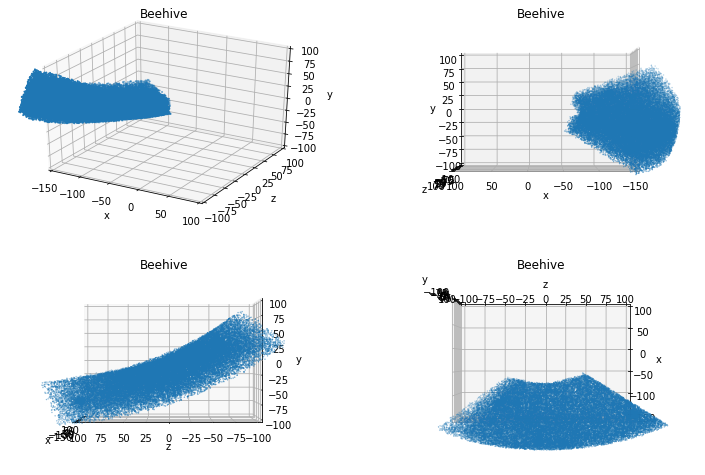

In [14]:
fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(pb['x'], pb['z'], pb['y'], s=1)
axp.set_xlim([-150, 100])
axp.set_ylim([-100, 100])
axp.set_zlim([-100, 100])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Beehive')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(pb['x'], pb['z'], pb['y'], s=0.1)
axp1.set_xlim([-150, 100])
axp1.set_ylim([-100, 100])
axp1.set_zlim([-100, 100])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Beehive')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(pb['x'], pb['z'], pb['y'], s=0.1)
axp2.set_xlim([-150, 100])
axp2.set_ylim([-100, 100])
axp2.set_zlim([-100, 100])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Beehive')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(pb['x'], pb['z'], pb['y'], s=0.1)
axp3.set_xlim([-150, 100])
axp3.set_ylim([-100, 100])
axp3.set_zlim([-100, 100])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Beehive')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()